In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Black Friday Dataset EDA And Feature Engineering

In [2]:
df_train = pd.read_csv(r'C:\Users\ANKUSH\Desktop\AI ML\blackFriday_train.csv')

In [3]:
df_train.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
330468,1002939,P00187842,F,26-35,15,B,1,0,1,16.0,NaN,11851
505246,1005830,P00003442,F,18-25,4,C,0,0,4,5.0,8.0,3504
179388,1003724,P00130742,M,36-45,6,B,4+,0,1,14.0,17.0,11543
456799,1004305,P00084842,F,46-50,17,B,1,1,8,16.0,NaN,7860
368181,1002740,P00216142,M,46-50,17,B,1,1,1,16.0,NaN,15451


In [4]:
df_test = pd.read_csv(r'C:\Users\ANKUSH\Desktop\AI ML\test.csv')

In [5]:
print("df_train columns:", df_train.columns)
print("df_test columns:", df_test.columns)



df_train columns: Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
df_test columns: Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


In [6]:
df =pd.concat([df_train,df_test],axis=0)

In [7]:
data = df.copy()

In [8]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
data.drop('User_ID',axis=1,inplace=True)

In [12]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
#covert the gender column to int
data['Gender'] = data['Gender'].map({'F':0 ,'M':1})
# OR
# df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
#age to int
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
#ORDINAL  ENCODING
data['Age'] = data['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [16]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
 # fixing city_category data
data_city = pd.get_dummies(data['City_Category'],drop_first=True, dtype="int")

In [18]:
data_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [19]:
data = pd.concat([data,data_city],axis=1)
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [20]:
data.drop('City_Category',axis=1,inplace=True)

In [21]:
#missing values
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [22]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [23]:
#as the both columns are categorical then we use mode
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [24]:
data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

0          8.0
1          6.0
2          8.0
3         14.0
4          8.0
          ... 
233594     8.0
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [25]:
data['Product_Category_2'].isnull().sum()

0

In [26]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])

In [27]:
data['Product_Category_3'].isnull().sum()

0

In [28]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [29]:
data['Stay_In_Current_City_Years'].unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].str.replace('+','')

In [31]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [32]:
#convert object to int
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype('int64')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(6), object(1)
memory usage: 71.7+ MB


In [34]:
data['B'] = data['B'].astype(int)
data['C'] = data['C'].astype(int)

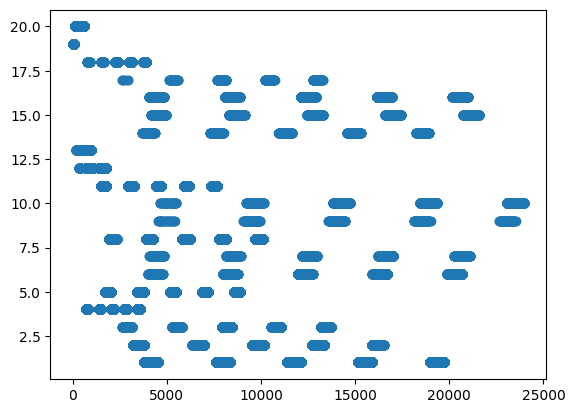

In [35]:
plt.scatter(x='Purchase',y='Product_Category_1',data=data)

plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

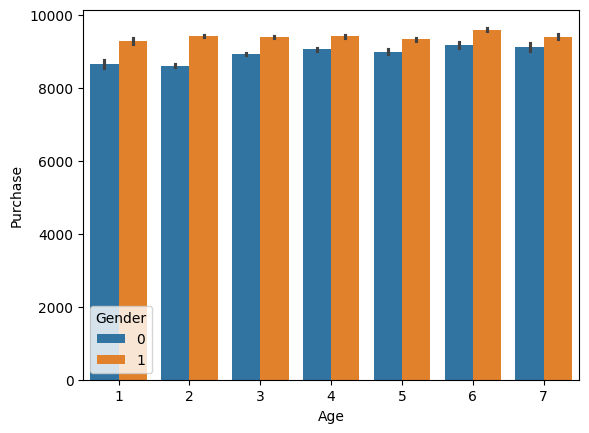

In [36]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=data)

<Axes: xlabel='Occupation', ylabel='Purchase'>

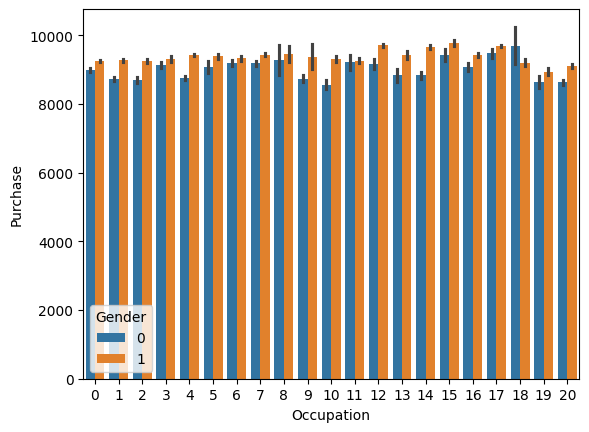

In [37]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=data)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

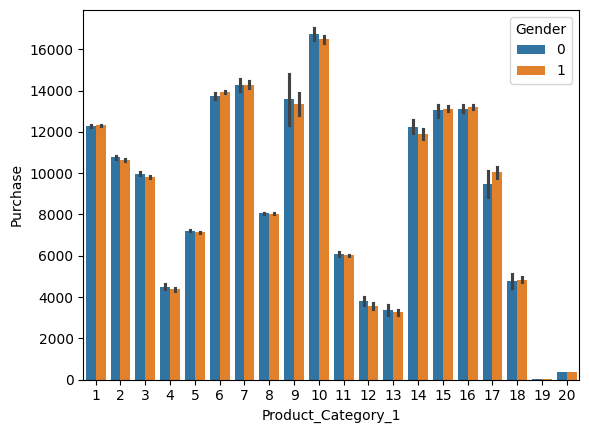

In [38]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=data)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

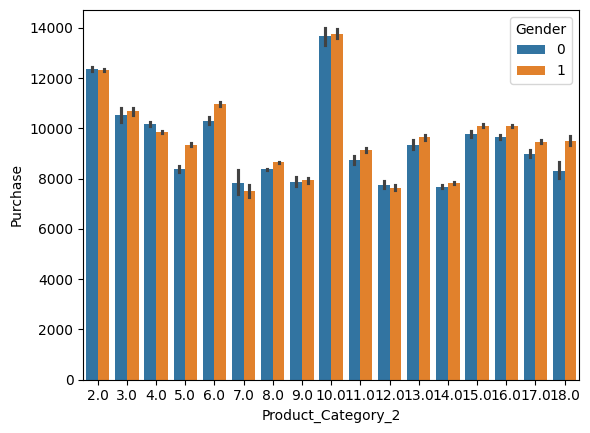

In [39]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=data)

In [74]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(6)
memory usage: 65.8 MB


In [82]:
data.describe()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
count,783667.00000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,550068.000000,783667.000000,783667.000000
mean,0.75291,3.496802,8.079300,1.858247,0.409777,5.366196,9.265541,14.988858,9263.968713,0.420764,0.310954
std,0.43132,1.352736,6.522206,1.288790,0.491793,3.878160,4.301427,2.740792,5023.065394,0.493682,0.462884
min,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000
25%,1.00000,3.000000,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000,0.000000,0.000000
50%,1.00000,3.000000,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000,0.000000,0.000000
75%,1.00000,4.000000,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000,1.000000,1.000000
max,1.00000,7.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000


In [73]:
data.drop('Product_ID',axis=1,inplace=True)

In [84]:
data['Purchase'] = data['Purchase'].fillna(data['Purchase'].mean())

In [85]:
x1 = data.drop('Purchase',axis=1)
y1 = data['Purchase']

In [86]:
print(x1.shape)
print(y1.shape)

(783667, 10)
(783667,)


In [40]:
#FEATURE SCALING
data_test = data[data['Purchase'].isnull()]

In [41]:
data_train = data[~data['Purchase'].isnull()]

In [42]:
x= data_train.drop('Purchase',axis=1)

In [43]:
y = data_train['Purchase']

In [44]:
from sklearn.model_selection import train_test_split

In [87]:
x_tr,x_te,y_tr,y_te=train_test_split(x1,y1,train_size=0.77,random_state=45)

In [46]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler


In [47]:
sc = StandardScaler()

In [48]:
x_tr.drop('Product_ID',axis=1,inplace=True)
x_te.drop('Product_ID',axis=1,inplace=True)

In [88]:
x_tr=sc.fit_transform(x_tr)
x_te = sc.transform(x_te)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
knn = KNeighborsRegressor()

In [89]:
knn.fit(x_tr,y_tr)

KNeighborsRegressor()

In [90]:
y_pred3 = knn.predict(x_te)
y_pred3

array([15040.58748518, 10782.38748518, 14111.2       , ...,
         278.        ,  8840.98748518, 11848.38122778])

In [91]:
r2_score(y_pred3,y_te)

-0.27321726046662853

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()

In [92]:
lr.fit(x_tr,y_tr)

LinearRegression()

In [93]:
lr.score(x_tr,y_tr)

0.09456853536541343

In [94]:
y_pred = lr.predict(x_te)
y_pred

array([ 8818.45907942, 11074.27680399, 10482.43128185, ...,
        4728.81418266,  8563.97383457, 10925.89444246])

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
mse = cross_val_score(lr,x_tr,y_tr,scoring='neg_mean_squared_error',cv=10)

In [97]:
np.mean(mse)

-16007504.389638448

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score

In [99]:
r2_score(y_pred,y_te)

-8.627020353433757

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_tr,y_tr)

In [ ]:
rf.score(x_tr,y_tr)

In [ ]:
y_pred2 = rf.predict(x_te)

In [ ]:
r2_score(y_pred2,y_te)